In [249]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import numpy as np

In [250]:
# Import Drug Deal network data
from networkx import read_graphml
K=read_graphml('inventory.graphml')

In [251]:
nx.is_directed(K)

True

In [252]:
# Convert to undirected
K_ud = K.to_undirected()
K_components = nx.connected_component_subgraphs(K_ud)
nx.is_directed(K_ud)

False

In [253]:
from networkx.algorithms import bipartite

bottom_nodes, top_nodes = bipartite.sets(K_ud)
bottom_nodes = set(K_ud) - top_nodes

### Extract deals and customers networks

In [254]:
# Extract deals network from bipartite graph
deals = bipartite.projected_graph(K_ud, top_nodes)
deals.edges()[0:5]

[('deal88', 'deal84'),
 ('deal88', 'deal86'),
 ('deal88', 'deal78'),
 ('deal88', 'deal66'),
 ('deal88', 'deal67')]

In [255]:
# Extract customers network from bipartite graph
customers = bipartite.projected_graph(K_ud, bottom_nodes)
customers.edges()[0:5]

[('Gonzalez', 'Cooper'),
 ('Gonzalez', 'Morales'),
 ('Gonzalez', 'Howard'),
 ('Gonzalez', 'Barnes'),
 ('Gonzalez', 'Edwards')]

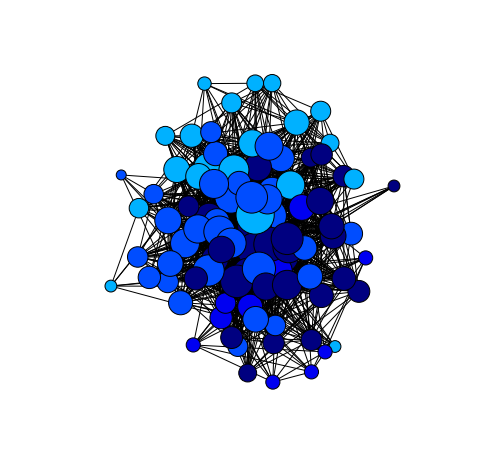

In [256]:
import community

# Find modularity
part = community.best_partition(deals)
mod = community.modularity(part,deals)
values = [part.get(node) for node in deals.nodes()]

# Plot by modularity, by degree of node
d = nx.degree(deals)
plt.figure(figsize=(6,6))
pos=nx.drawing.spring_layout(deals, k=0.25,iterations=20)
nx.draw(deals, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=[v * 20 for v in d.values()], with_labels=False)

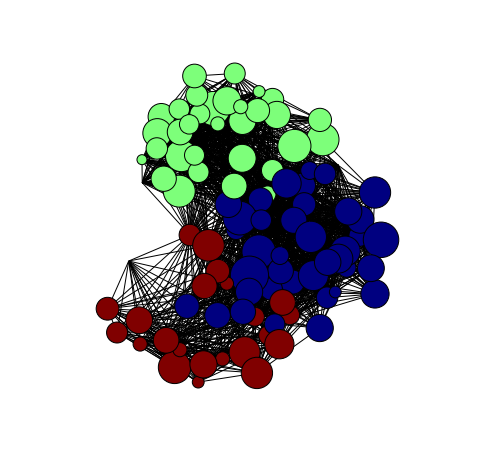

In [257]:
import community

# Find modularity
part = community.best_partition(customers)
mod = community.modularity(part,customers)
values = [part.get(node) for node in customers.nodes()]

# Plot by modularity, by degree of node
c = nx.degree(customers)
plt.figure(figsize=(6,6))
pos=nx.drawing.spring_layout(customers, k=0.25,iterations=20)
nx.draw(customers, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=[v * 20 for v in d.values()], with_labels=False)

### Generate weighted bipartite graphs

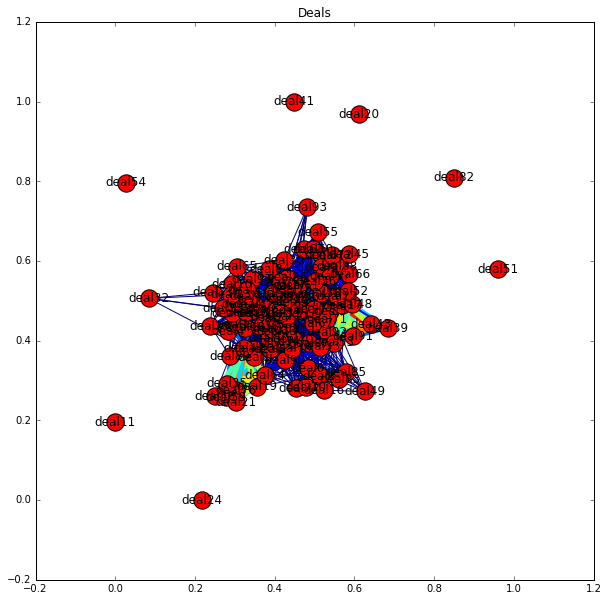

In [258]:
deals = bipartite.weighted_projected_graph(K_ud,deals,ratio=False)
weights = [edata['weight'] for f,t,edata in deals.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(deals, width=weights, edge_color=weights)
plt.title('Deals')

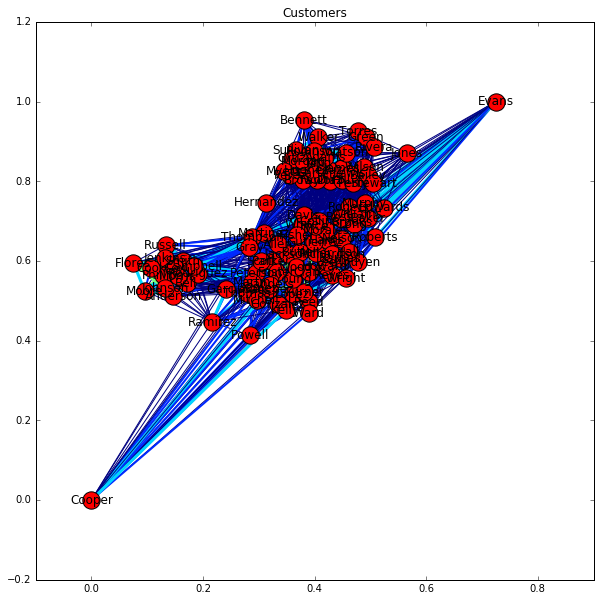

In [259]:
customers = bipartite.weighted_projected_graph(K_ud,customers,ratio=False)
weights = [edata['weight'] for f,t,edata in customers.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(customers, width=weights, edge_color=weights)
plt.title('Customers')

In [260]:
deals.number_of_nodes()

99

In [261]:
customers.number_of_nodes()

100

## Deals Network: Isolate subgraphs with island method (SNA, c.4)

In [262]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [263]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [264]:
islands = island_method(deals)
for i in islands:
    print i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1])))

1 87 2
2 66 1
3 46 1
4 28 3
5 21 3
6 18 3
7 12 2
8 4 2
9 2 1


### Graph subgraphs at mid-level and lowest level

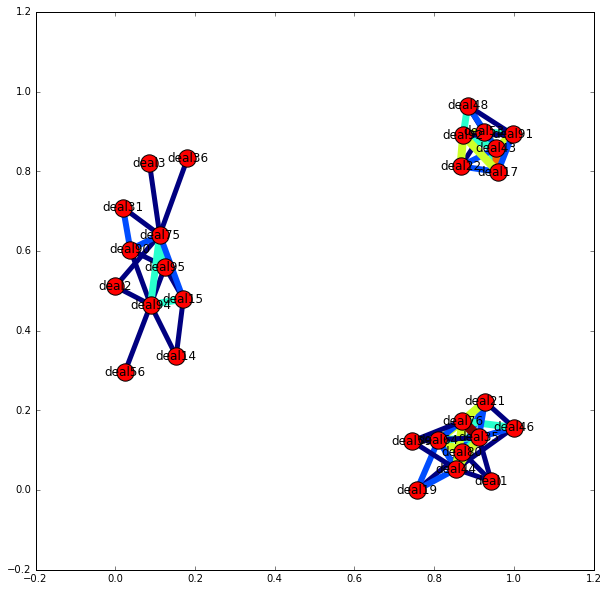

In [265]:
# Level 4
d2 = trim_edges(deals,4)
weights = [edata['weight'] for f,t,edata in d2.edges(data=True)]
plt.figure(figsize=(10, 10))
nx.draw_networkx(d2, width=weights, edge_color=weights)

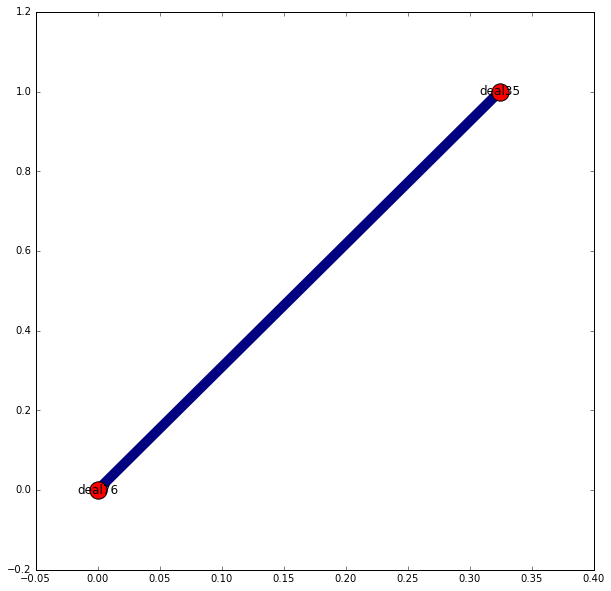

In [266]:
# Level 9
d3 = trim_edges(deals,9)
weights = [edata['weight'] for f,t,edata in d3.edges(data=True)]
plt.figure(figsize=(10, 10))
nx.draw_networkx(d3, width=weights, edge_color=weights)

### Isloate ego networks

In [267]:
d5 = nx.Graph(nx.ego_graph(deals,'deal5', radius=2))
ndeals5 = len(d5)
aclustd5 = nx.average_clustering(d5)
dcentd5 = nx.degree_centrality(d5)
print '# deals:', ndeals5, '/ clustering coef.:', aclustd5

# deals: 92 / clustering coef.: 0.682633938572


In [268]:
d6 = nx.Graph(nx.ego_graph(deals,'deal6', radius=2))
ndeals6 = len(d6)
aclustd6 = nx.average_clustering(d6)
print '# deals:', ndeals6, '/ clustering coef.:', aclustd6

# deals: 86 / clustering coef.: 0.670856902049


### Deal5 looks like the most connected subgraph, with 92 deals and a clustering coefficient of 0.682634.

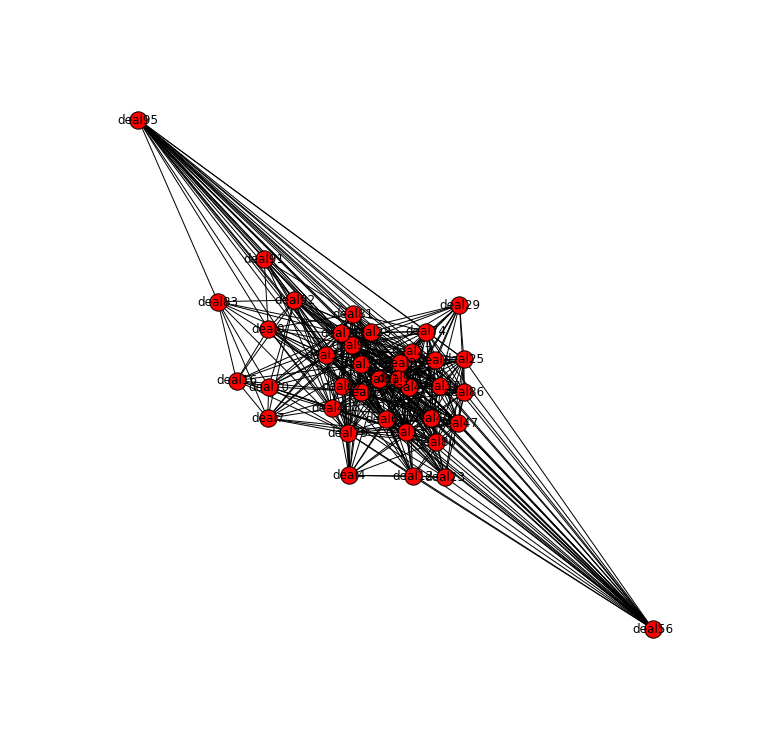

In [269]:
egod = nx.ego_graph(deals,'deal5', undirected=True)
plt.figure(figsize=(10, 10))
nx.draw(egod, with_labels=True)

## Customers Network: Isolate subgraphs with island method (SNA, c.4)

In [270]:
islands = island_method(customers)
for i in islands:
    print i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1])))

1 99 1
2 87 2
3 63 4
4 34 7
5 17 4
6 8 3


### Graph subgraphs at mid-level and lowest level

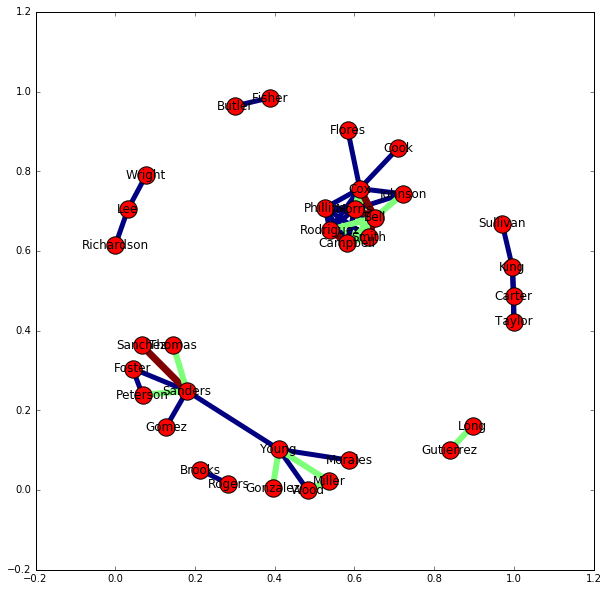

In [271]:
c2 = trim_edges(customers, 4)
weights = [edata['weight'] for f,t,edata in c2.edges(data=True)]
plt.figure(figsize=(10, 10))
nx.draw_networkx(c2, width=weights, edge_color=weights)

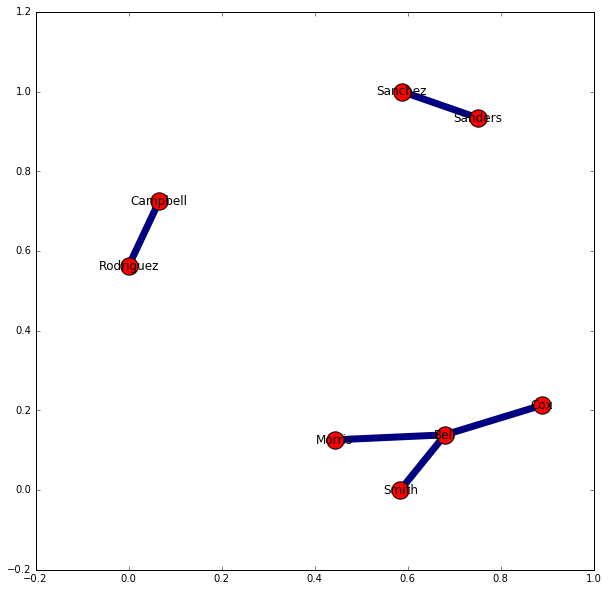

In [272]:
c3 = trim_edges(customers, 6)
weights = [edata['weight'] for f,t,edata in c3.edges(data=True)]
plt.figure(figsize=(10, 10))
nx.draw_networkx(c3, width=weights, edge_color=weights)

### Isloate ego networks

In [273]:
cBell = nx.Graph(nx.ego_graph(customers,'Bell', radius=2))
ncBell = len(cBell)
aclustcBell = nx.average_clustering(cBell)
print '# deals:', ncBell, '/ clustering coef.:', aclustcBell

# deals: 94 / clustering coef.: 0.692089251373


In [274]:
cCampbell = nx.Graph(nx.ego_graph(customers,'Campbell', radius=2))
ncCampbell = len(cCampbell)
aclustcCampbell = nx.average_clustering(cCampbell)
print '# deals:', ncCampbell, '/ clustering coef.:', aclustcCampbell

# deals: 94 / clustering coef.: 0.692089251373


In [275]:
cSanders = nx.Graph(nx.ego_graph(customers,'Sanders', radius=2))
ncSanders = len(cSanders)
aclustcSanders = nx.average_clustering(cSanders)
print '# deals:', ncSanders, '/ clustering coef.:', aclustcSanders

# deals: 100 / clustering coef.: 0.689933204322


In [276]:
cSanchez = nx.Graph(nx.ego_graph(customers,'Sanchez', radius=2))
ncSanchez = len(cSanchez)
aclustcSanchez = nx.average_clustering(cSanchez)
print '# deals:', ncSanchez, '/ clustering coef.:', aclustcSanchez

# deals: 100 / clustering coef.: 0.689933204322


In [277]:
cRodriguez = nx.Graph(nx.ego_graph(customers,'Rodriguez', radius=2))
ncRodriguez = len(cRodriguez)
aclustcRodriguez = nx.average_clustering(cRodriguez)
print '# deals:', ncSanchez, '/ clustering coef.:', aclustcSanchez

# deals: 100 / clustering coef.: 0.689933204322


In [278]:
egoc = nx.ego_graph(customers,'Bell', undirected=True)
egoc2 = nx.ego_graph(customers,'Campbell', undirected=True)
egoc3 = nx.ego_graph(customers,'Sanders', undirected=True)
egoc4 = nx.ego_graph(customers,'Sanchez', undirected=True)
egoc5 = nx.ego_graph(customers,'Rodriguez', undirected=True)

In [279]:
ec1 = nx.number_of_nodes(egoc)
ec2 = nx.number_of_nodes(egoc2)
ec3 = nx.number_of_nodes(egoc3)
ec4 = nx.number_of_nodes(egoc4)
ec5 = nx.number_of_nodes(egoc5)
print ec1, ec2, ec3, ec4, ec5

28 31 60 60 31


### Sanders and Sanchez are the most connected subgraphs, each with 60 connections and a clustering coefficient of 0.689933; Bell had a lower number of connections (31), but a higher clustering coefficient (0.6920893).

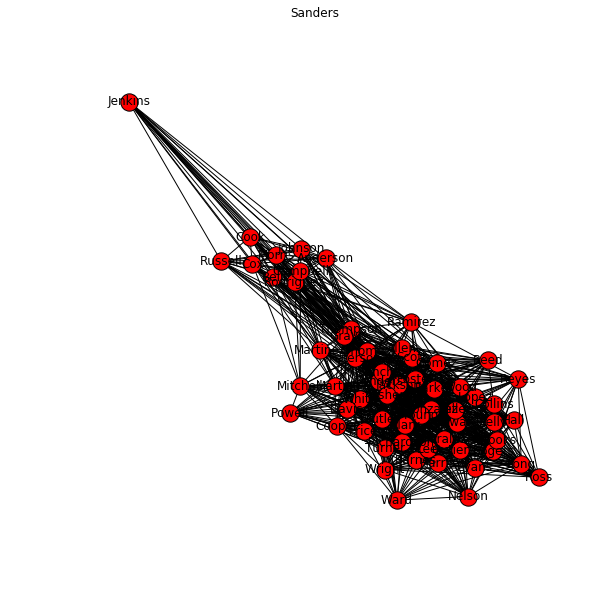

In [280]:
plt.figure(figsize=(10, 10))
plt.title('Sanders')
nx.draw(egoc3, with_labels=True)

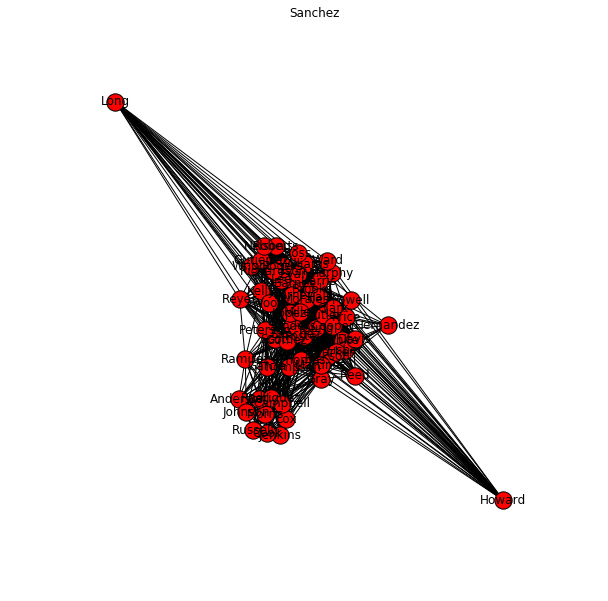

In [281]:
plt.figure(figsize=(10, 10))
plt.title('Sanchez')
nx.draw(egoc4, with_labels=True)